# Create an input file

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors

### Build particle coordinates (2D)

The function ```build_particle_coordinates``` is used to build a rectangular set of particles with regular spacing

In [48]:
def build_particle_coordinates(dx, n_div_x, n_div_y):
    """
    Build particle coordinates
    
    Parameters
    ----------
    
    Returns
    -------

    Notes
    -----
    
    """
    particle_coordinates = np.zeros([n_div_x * n_div_y, 2])
    counter = 0

    for i_y in range(n_div_y):      # Depth
        for i_x in range(n_div_x):  # Length
            coord_x = dx * i_x
            coord_y = dx * i_y
            particle_coordinates[counter, 0] = coord_x
            particle_coordinates[counter, 1] = coord_y
            counter += 1

    return particle_coordinates

### Build particle families

Build a neighbour list of size (nnodes $\times$ max(n\_family\_members)). Pad empty cells with -1

$$\textbf{neighbourlist} =
\begin{bmatrix}
   1 & 2 & \dots & -1 \\
   2 & 1 & \dots & -1\\
   \vdots & \vdots & \dots & -1\\
   nnodes & nnodes & \dots & -1
\end{bmatrix}_{\: nnodes \, \times \, max(n\_family\_members)}
$$


In [49]:
def build_particle_families(x, horizon):
    """
    Build particle families

    Parameters
    ----------
    x : ndarray (float)
        Material point coordinates in the reference configuration

    horizon : float
        Material point horizon (non-local length scale)

    Returns
    -------
    nlist : list of numpy arrays (int)

    Notes
    -----

    """
    n_nodes = np.shape(x)[0]

    tree = neighbors.KDTree(x, leaf_size=160)
    neighbour_list = tree.query_radius(x, r = horizon)

    # Remove identity values, as there is no bond between a node and itself
    neighbour_list = [neighbour_list[i][neighbour_list[i] != i] for i in range(n_nodes)]

    n_family_members = [len(neighbour_list[i]) for i in range(n_nodes)]
    n_family_members = np.array(n_family_members, dtype = np.intc)

    nlist = np.ones((n_nodes, n_family_members.max()), dtype=np.intc) * -1
    
    for i in range(n_nodes):
        nlist[i, :n_family_members[i]] = neighbour_list[i]

    nlist = nlist.astype(np.intc)

    return nlist

### Build bond list (neighbour list)

In [50]:
def build_bond_list(nlist):
    """
    Build bond list
    """
    bondlist = [[i, j] for i, neighbours in enumerate(nlist) for j in neighbours if i < j]
    bondlist = np.array(bondlist, dtype=np.intc)
    
    return bondlist

### Define boundary conditions

This won't work as is. Say for a node that ```bc_flag = 1``` and ```bc_unit_vector = 0```, then that node is constrained

* Applied displacement
    * Flag (1 - the node is subject to a boundary condition, 0 - no boundary condition)
    * Direction (unit vector)
    * Magnitude
* Applied force
    * Flag
    * Direction (unit vector)
    * Magnitude
* Constraint

In [53]:
def build_boundary_conditions(particles):
    
    bc_flag = np.zeros((len(particles), 2), dtype=np.intc)
    bc_unit_vector = np.zeros((len(particles), 2), dtype=np.intc)

    for i, particle in enumerate(particles):
        if particle[0] < 50:
            bc_flag[i, 0] = 1
            bc_unit_vector[i, 0] = -1
        if particle[0] > 450:
            bc_flag[i, 0] = 1
            bc_unit_vector[i, 0] = 1

    return bc_flag, bc_unit_vector

### Calculate partial volume correction factors (to improve spatial integration accuracy)

### Calculate surface correction factors (to correct the peridynamic surface effect)

### Calculate bond stiffness

### Calculate stable time step

### Build input file

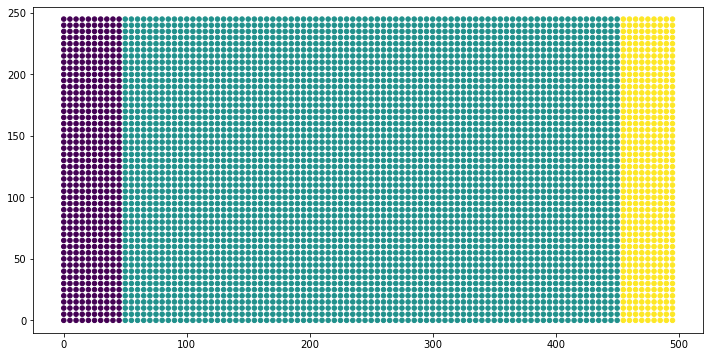

In [55]:
def build_input_file():
    
    dx = 5
    n_div_x = 100
    n_div_y = 50
    horizon = np.pi * dx
    
    x = build_particle_coordinates(dx, n_div_x, n_div_y)
    nlist = build_particle_families(x, horizon)
    bondlist = build_bond_list(nlist)

    bc_flag, bc_unit_vector = build_boundary_conditions(x)

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.scatter(x[:,0], x[:,1], s=20, c=bc_unit_vector[:,0])
    plt.axis('equal')
    
build_input_file()